In [114]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

def load_data(ticker):

    filename = '../data/' + ticker + '_1min_firstratedata.csv'
    df = pd.read_csv(filename)
    df['ticker'] = ticker

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["date"] = df["timestamp"].dt.date
    df["time"] = df["timestamp"].dt.time
    return df

ticker = 'MSFT'
df = load_data(ticker)

In [115]:
def RSI(df, n):
    "function to calculate RSI"
    delta = df["close"].diff()
    delta = delta[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    df["up"] = up.round(4)
    df["down"] = down.round(4)
    AVG_Gain = df["up"].rolling(window=n).mean()
    AVG_Loss = abs(df["down"].rolling(window=n).mean())
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0 / (1.0 + RS))
    df["RSI_14"] = RSI.round(4)
    df = df.drop(columns=["up", "down"])

    return df

df = RSI(df, 14)

In [116]:
# print the first 20 rows
df.head(20)
df['RSI_14'].describe()

count    158985.000000
mean         50.334045
std          15.933442
min           0.000000
25%          39.610300
50%          50.188000
75%          61.053300
max         100.000000
Name: RSI_14, dtype: float64

In [117]:
import datetime

df = df[df["time"] >= datetime.time(9, 0, 0)]
df = df[df["time"] <= datetime.time(16, 0, 0)]
df.head(20)

,timestamp,open,high,low,close,volume,ticker,date,time,RSI_14
124,2022-09-30 09:00:00,239.280,239.580,239.280,239.49,2975,MSFT,2022-09-30,09:00:00,44.8111
125,2022-09-30 09:02:00,239.110,239.500,239.040,239.50,521,MSFT,2022-09-30,09:02:00,47.2755
126,2022-09-30 09:03:00,239.360,239.370,239.100,239.10,2374,MSFT,2022-09-30,09:03:00,44.5563
127,2022-09-30 09:04:00,238.900,238.900,238.350,238.36,1982,MSFT,2022-09-30,09:04:00,38.3050
128,2022-09-30 09:05:00,238.370,238.370,238.290,238.29,2976,MSFT,2022-09-30,09:05:00,40.7450
129,2022-09-30 09:06:00,238.450,238.450,238.450,238.45,321,MSFT,2022-09-30,09:06:00,44.6502
130,2022-09-30 09:07:00,238.500,238.600,238.450,238.60,1349,MSFT,2022-09-30,09:07:00,49.4940
131,2022-09-30 09:08:00,238.300,238.300,238.070,238.07,1190,MSFT,2022-09-30,09:08:00,41.0338
132,2022-09-30 09:09:00,238.100,238.100,238.100,238.10,700,MSFT,2022-09-30,09:09:00,41.3911
133,2022-09-30 09:10:00,238.300,238.460,238.300,238.46,326,MSFT,2022-09-30,09:10:00,51.7118


In [118]:
# delete columns high and low
df = df.drop(columns=["open", "high", "low", "close", "volume"])
df.head(20)

,timestamp,ticker,date,time,RSI_14
124,2022-09-30 09:00:00,MSFT,2022-09-30,09:00:00,44.8111
125,2022-09-30 09:02:00,MSFT,2022-09-30,09:02:00,47.2755
126,2022-09-30 09:03:00,MSFT,2022-09-30,09:03:00,44.5563
127,2022-09-30 09:04:00,MSFT,2022-09-30,09:04:00,38.3050
128,2022-09-30 09:05:00,MSFT,2022-09-30,09:05:00,40.7450
129,2022-09-30 09:06:00,MSFT,2022-09-30,09:06:00,44.6502
130,2022-09-30 09:07:00,MSFT,2022-09-30,09:07:00,49.4940
131,2022-09-30 09:08:00,MSFT,2022-09-30,09:08:00,41.0338
132,2022-09-30 09:09:00,MSFT,2022-09-30,09:09:00,41.3911
133,2022-09-30 09:10:00,MSFT,2022-09-30,09:10:00,51.7118


In [119]:
reshaped_df = df.pivot(index='time', columns='date', values='RSI_14')

In [120]:
reshaped_df.head(20)

date,2022-09-30,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-10,2022-10-11,2022-10-12,2022-10-13,...,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29
time,,,,,,,,,,,,,,,,,,,,,
09:00:00,44.8111,50.7143,61.9048,27.7419,42.5676,42.2852,61.4035,33.9580,42.3481,62.2201,...,35.3090,NaN,58.9195,58.0290,45.8015,NaN,32.5927,46.9880,47.6749,57.7220
09:01:00,NaN,61.6115,58.2051,NaN,40.0000,45.6311,60.8773,44.5630,39.4350,60.8416,...,35.3090,25.9384,NaN,57.3034,47.7172,42.9379,32.5858,45.6790,NaN,53.8982
09:02:00,47.2755,NaN,51.7800,NaN,NaN,42.2156,49.0798,49.3794,35.9656,62.2485,...,23.9218,28.0772,NaN,48.0714,NaN,NaN,NaN,45.1220,45.1650,56.6288
09:03:00,44.5563,48.9384,67.0304,38.1215,39.6166,43.7888,58.3333,57.2615,42.0734,67.3047,...,NaN,40.2231,NaN,50.0000,43.6508,54.0908,NaN,52.7027,54.5286,58.5895
09:04:00,38.3050,48.5928,55.5360,NaN,NaN,45.1515,56.7336,51.3878,44.0971,54.4456,...,NaN,25.0794,63.1459,52.0358,44.0000,49.9973,NaN,NaN,49.5950,42.4799
09:05:00,40.7450,NaN,56.5557,46.3277,36.2573,54.6326,47.8261,53.7809,41.4832,52.1814,...,21.1624,26.0533,63.0445,53.6749,NaN,29.7215,47.2797,46.9880,51.2555,47.1823
09:06:00,44.6502,57.5262,50.3299,47.9769,37.9205,49.8233,42.4658,51.3878,37.8694,51.0598,...,28.8392,34.0991,76.1359,52.4261,42.9688,33.5504,36.9708,40.7643,56.0391,46.4779
09:07:00,49.4940,50.4391,39.5785,NaN,37.1517,43.6170,56.0284,NaN,33.8294,48.9833,...,24.4115,35.1572,81.4045,54.1999,39.6368,33.1059,34.3688,NaN,58.9307,46.4779
09:08:00,41.0338,50.6616,42.0974,34.2342,NaN,44.5652,57.7823,41.4503,37.5212,50.6824,...,24.1641,31.0627,NaN,52.1920,57.1876,18.5937,39.0150,50.2857,42.0165,44.0295


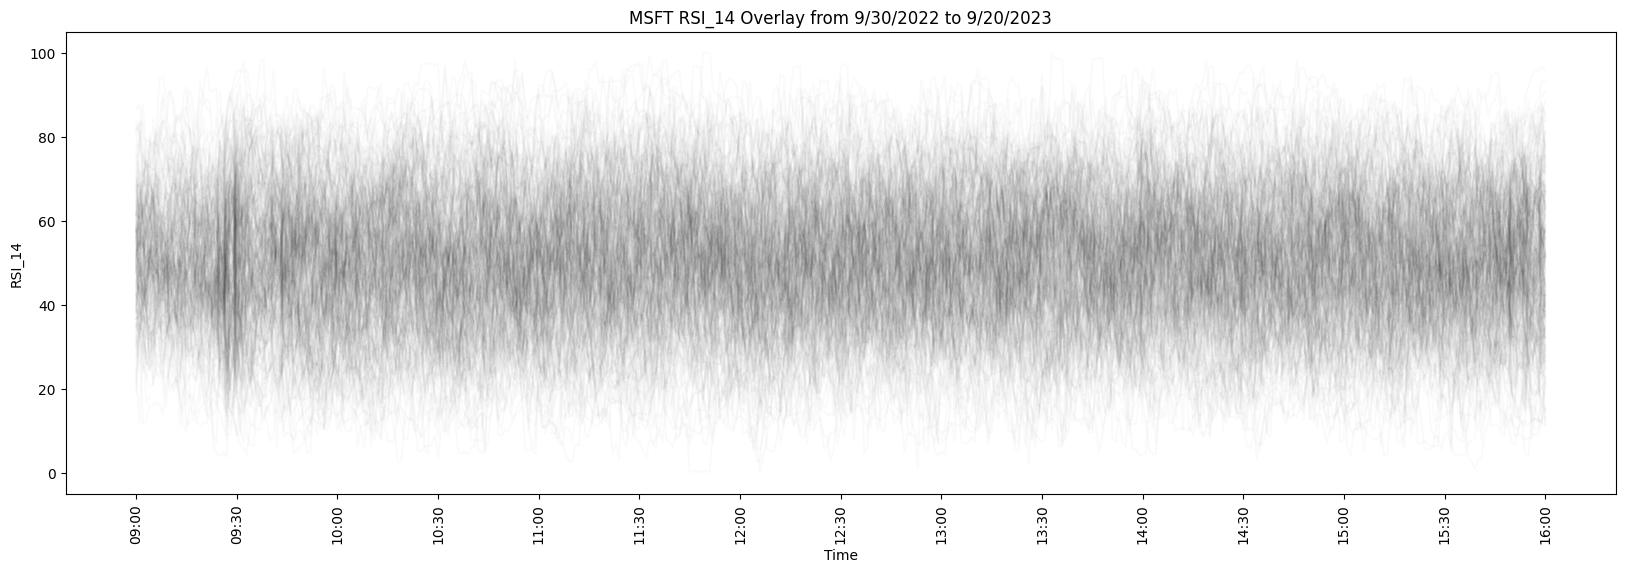

In [121]:
import matplotlib.pyplot as plt

# Assuming reshaped_df is your reshaped DataFrame from the previous step

# Plotting with semi-transparent lines
reshaped_df.plot.line(figsize=(20, 6), color='black', alpha=0.02, legend=False)

# Setting labels and title
plt.xlabel('Time')
plt.ylabel('RSI_14')
plt.title(ticker + ' RSI_14 Overlay from 9/30/2022 to 9/20/2023')

# add x axis markers at every 30 minutes
plt.xticks(reshaped_df.index[::30], rotation=90)

# Display the plot
plt.show()

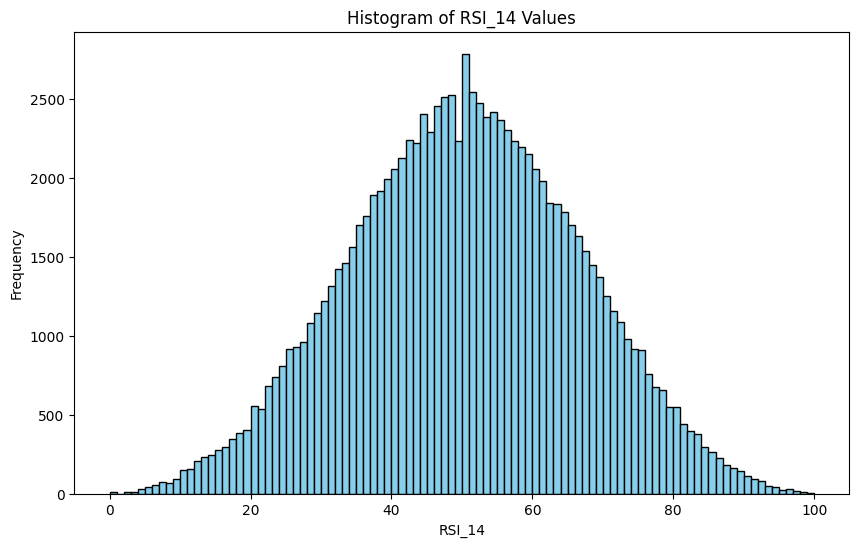

In [122]:
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['RSI_14'], bins=100, color='skyblue', edgecolor='black')

# Setting labels and title
plt.xlabel('RSI_14')
plt.ylabel('Frequency')
plt.title('Histogram of RSI_14 Values')

# Display the plot
plt.show()

In [123]:
import plotly.express as px

# Assuming reshaped_df is your reshaped DataFrame from the previous step

# Calculate standard deviation along rows (axis=1)
reshaped_df['std_dev'] = reshaped_df.std(axis=1)

# Plotting standard deviation
fig = px.line(reshaped_df, x=reshaped_df.index, y='std_dev', line_shape='linear', render_mode='svg')

# Setting labels and title
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Standard Deviation',
    title='Standard Deviation of RSI across the day, market hours'
)

# Show the plot
fig.show()


Opening RSI SD:
- TSLA: 23
- SPY: 19.7
- AAPL: 21
- AMZN: 21
- META: 18.9
- MSFT: 18.2, stays high throughout the day though
- VXX: irregular pattern, no spike at 9:30